
===== DATASET INFO =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        891 non-null    object  
 11  Embarked     891 non-null    category
dtypes: category(2), float64(2), int64(5), object(3)
memory usage: 71.7+ KB
None

===== SUMMARY STATISTICS =====
        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique

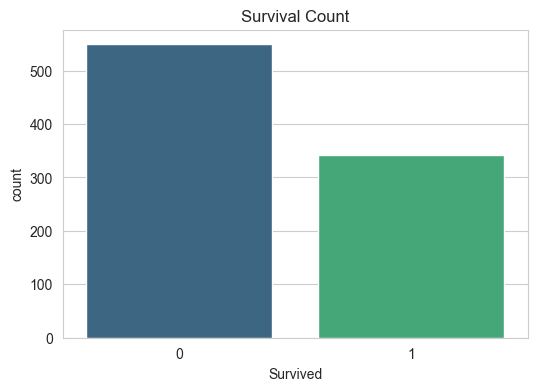

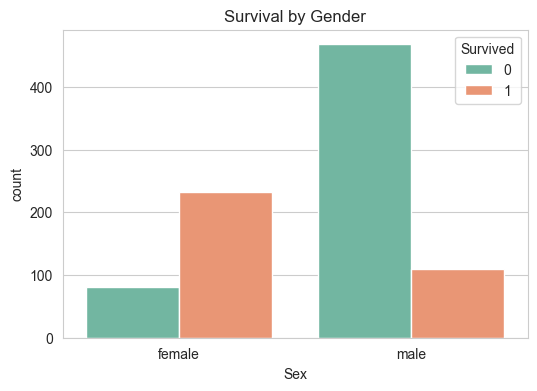

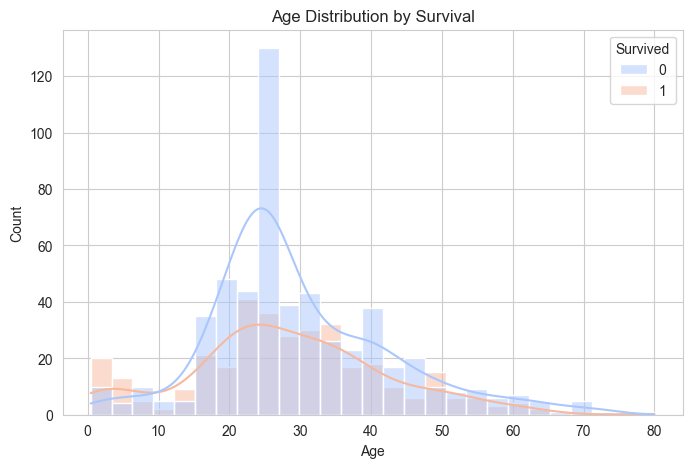

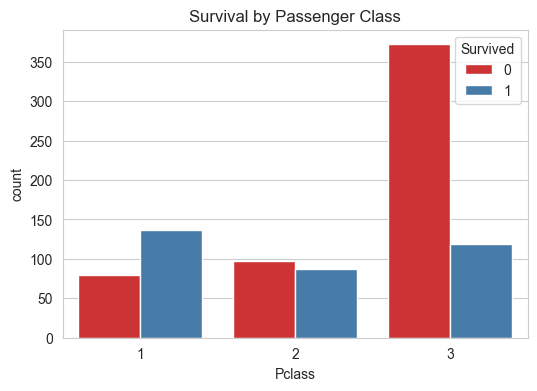

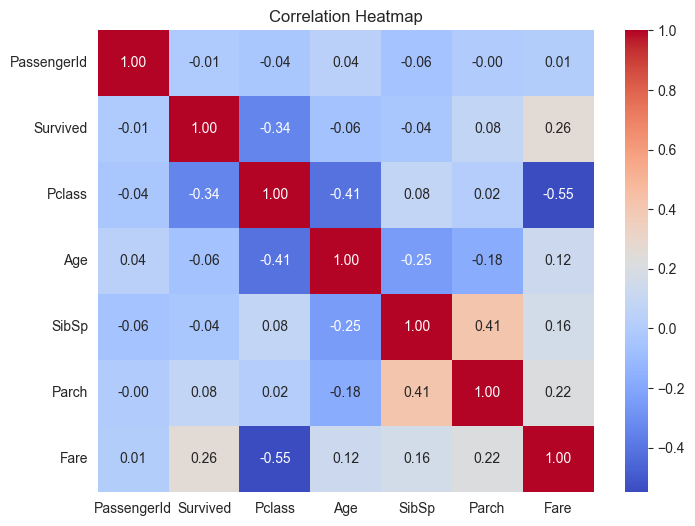

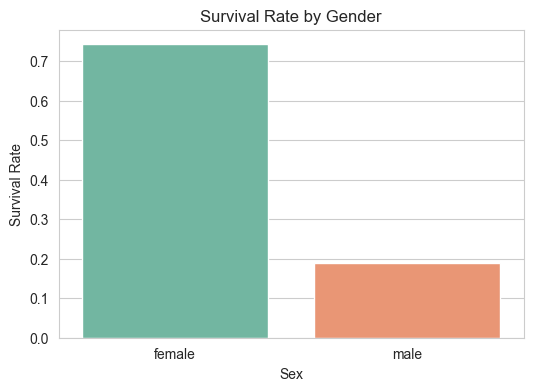

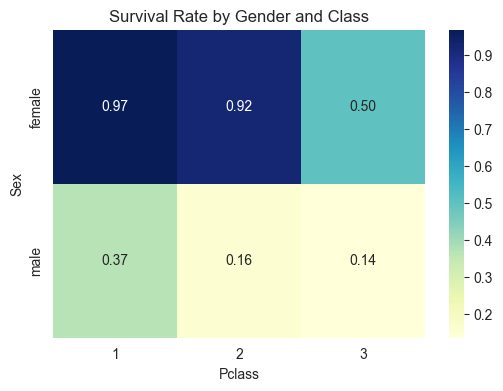

In [9]:
# TITANIC DATASET EXPLORATION, CLEANING & VISUALIZATION

# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. LOADING DATA
df = pd.read_csv("titanic.csv")

# 3. DATA CLEANING

# Fill missing 'Embarked' with most frequent value (mode)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Fill missing 'Fare' with median value based on Pclass
df['Fare'] = df.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.median()))

# Fill missing 'Age' with median value based on Sex & Pclass
df['Age'] = df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

# Fill missing 'Cabin' with 'Unknown'
df['Cabin'] = df['Cabin'].fillna('Unknown')

# Final check: Fill any remaining missing values with median (for numeric columns)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# Convert categorical to category type
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

# 4. SUMMARY STATISTICS
print("\n===== DATASET INFO =====")
print(df.info())
print("\n===== SUMMARY STATISTICS =====")
print(df.describe(include='all'))

# 5. GROUP-BASED INSIGHTS
print("\n===== SURVIVAL BY GENDER =====")
print(df.groupby('Sex', observed=True)['Survived'].mean())

print("\n===== SURVIVAL BY CLASS =====")
print(df.groupby('Pclass', observed=True)['Survived'].mean())

print("\n===== SURVIVAL BY GENDER & CLASS =====")
print(df.groupby(['Sex', 'Pclass'], observed=True)['Survived'].mean())

df.to_csv("titanic_cleaned.csv", index=False)
print(" Clean dataset saved as 'titanic_cleaned.csv'")

# 6. VISUALIZATIONS
sns.set_style("whitegrid")

# Survival count
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', hue='Survived', data=df, palette='viridis', legend=False)
plt.title('Survival Count')
plt.show()

# Survival by Gender (count)
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set2')
plt.title('Survival by Gender')
plt.show()

# Age distribution by Survival
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', hue='Survived', kde=True, palette='coolwarm')
plt.title('Age Distribution by Survival')
plt.show()

# Survival by Class (count)
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set1')
plt.title('Survival by Passenger Class')
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# 7. VISUALIZATIONS
# Bar plot - Survival rate by Gender
plt.figure(figsize=(6,4))
survival_rates = df.groupby('Sex', observed=True)['Survived'].mean().reset_index()
sns.barplot(x='Sex', y='Survived', hue='Sex', data=survival_rates, palette='Set2', legend=False)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()

# Heatmap - Survival rate by Gender and Class
plt.figure(figsize=(6,4))
pivot = df.pivot_table(values='Survived', index='Sex', columns='Pclass', observed=True)
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Survival Rate by Gender and Class')
plt.show()
